In [1]:
!pip install --upgrade tensorflow==1.15
!pip install -U -q scipy

Requirement already up-to-date: tensorflow==1.15 in /usr/local/lib/python3.7/dist-packages (1.15.0)


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [3]:
def load_dataset():
  dataset = loadmat('olivettifaces.mat')
  images = dataset['faces']
  face_images = np.transpose(images)
  
  return face_images.astype(float), face_images


In [4]:
dataset,original = load_dataset()

In [5]:
def calculate_mean(dataset):
  return tf.reduce_mean(dataset,axis=0)

In [6]:
mean = calculate_mean(dataset)

In [7]:
def normalize_dataset(dataset,mean):
  return dataset-mean

In [8]:
dataset = normalize_dataset(dataset, mean)

In [9]:
def calculate_covariance(dataset):
  return tf.matmul(dataset, tf.transpose(dataset))

In [10]:
covariance = calculate_covariance(dataset)

In [11]:
def calculate_eigen_vector(covariance):
  eigen_value, eigen_vector = tf.raw_ops.SelfAdjointEigV2(input=covariance)
  return tf.reverse(eigen_vector,[1])

In [12]:
eigen_vector = calculate_eigen_vector(covariance)

In [13]:
def calculate_eigen_faces(dataset, eigen_vector):
  eigen_faces = tf.matmul(tf.transpose(dataset),eigen_vector)
  return tf.transpose(eigen_faces)

In [14]:
eigen_faces = calculate_eigen_faces(dataset, eigen_vector)

In [15]:
def show_image(image):
  reshaped_image = image.reshape(64,64)
  plt.imshow(reshaped_image)
  plt.show()

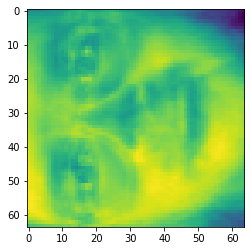

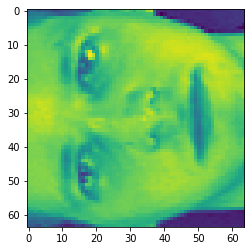

In [16]:
with tf.Session() as sess:
  result = sess.run(eigen_faces)
  show_image(result[0])
  show_image(original[0])

In [17]:
from sklearn.decomposition import PCA

In [18]:
def apply_pca(normalize_dataset):
  pca = PCA(n_components=3)
  pca = pca.fit(normalize_dataset)
  return pca.components_


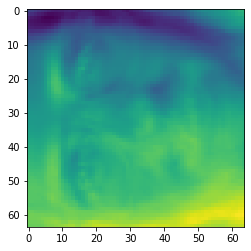

In [19]:
with tf.Session() as sess:
  dataset = sess.run(dataset)
  result = apply_pca(dataset)
  show_image(result[1])